# Credit Risk Analysis - 4

## Classification with Random Forest

### Training/Test Split

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [2]:
df_loan_default = pd.read_csv("credit_risk_dataset_feat.csv")
df_loan_default

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.013514,0.005932,0.121951,0.014493,0.321348,0,0.10,0.000000,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.067568,0.005932,0.024390,0.144928,0.418539,1,0.57,0.035714,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0.040541,0.065148,0.097561,1.000000,0.551124,1,0.53,0.000000,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.054054,0.053390,0.195122,1.000000,0.497191,1,0.55,0.071429,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.013514,0.006250,0.048780,0.057971,0.096629,1,0.25,0.000000,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32561,0.500000,0.051907,0.024390,0.153623,0.434831,0,0.11,1.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
32562,0.459459,0.122881,0.097561,0.496377,0.116292,0,0.15,0.607143,1,0,...,0,1,0,0,0,0,0,0,1,0
32563,0.608108,0.076271,0.073171,1.000000,0.312921,1,0.46,0.928571,0,0,...,0,0,1,0,0,0,0,0,1,0
32564,0.486486,0.154661,0.121951,0.420290,0.340449,0,0.10,0.857143,1,0,...,0,0,1,0,0,0,0,0,1,0


In [3]:
x = df_loan_default.drop(['loan_status'], axis=1)
y = df_loan_default['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)

In [4]:
print("Training Features Shape", x_train.shape)
print("Training Label Rows", y_train.count())

Training Features Shape (26052, 26)
Training Label Rows 26052


In [5]:
print("Testing Features Shape", x_test.shape)
print("Testing Label Rows", y_test.count())

Testing Features Shape (6514, 26)
Testing Label Rows 6514


In [6]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

loan_status
0    0.780132
1    0.219868
Name: proportion, dtype: float64
loan_status
0    0.788302
1    0.211698
Name: proportion, dtype: float64


In [7]:
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10)

## Model Evaluation

In [8]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [9]:
def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    conf_mat = confusion_matrix(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
    plt.show()

    #print(conf_mat)
    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

    #Show ROC Curve 
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    #plot the distribution of probabilities for the estimated classes 
    sns.kdeplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", fill=True)
    sns.kdeplot(results_df[results_df['true_class'] == 1]['default_prob'], label="Default", fill=True)
    plt.title('Distribution of Probabilities for Estimated Classes')
    plt.legend(loc='best')
    plt.show()
    
    #see the true class versus predicted class as a percentage
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))

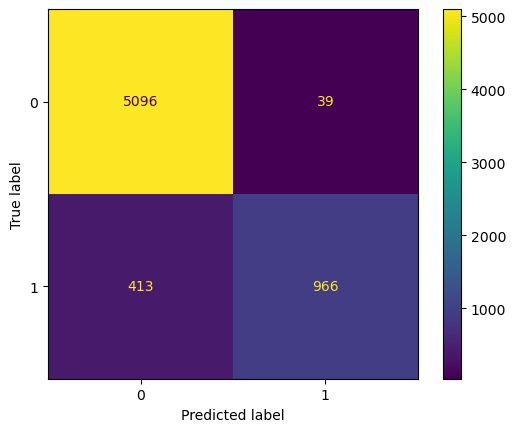



Accuracy:  0.9306109917101627
Precision:  0.9611940298507463
Recall:  0.700507614213198
F1:  0.8104026845637583
AUC:  0.9206910162381473


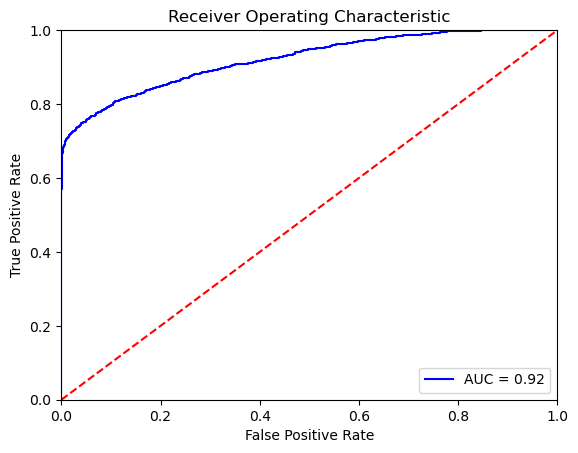

C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


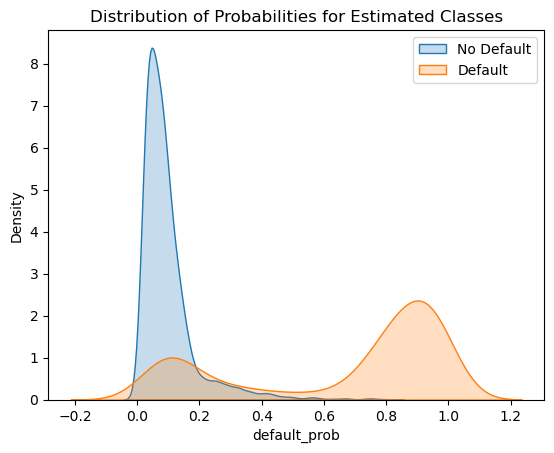

true_class  predicted_class
0           0                  0.992405
            1                  0.007595
1           1                  0.700508
            0                  0.299492
Name: proportion, dtype: float64


In [10]:
eval_model(rfc_model, x_test, y_test)

## Testing Overfitting

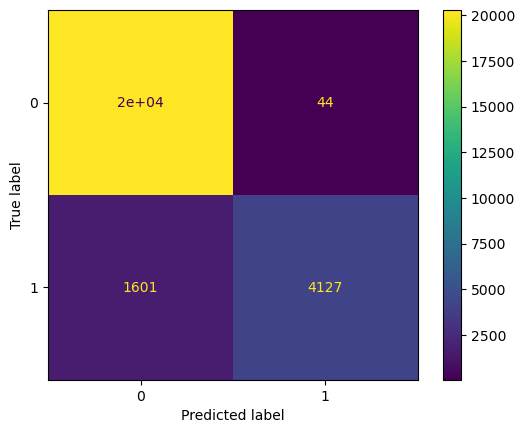



Accuracy:  0.9368570551205282
Precision:  0.9894509709901702
Recall:  0.7204958100558659
F1:  0.8338215981412264
AUC:  0.9467016791318627


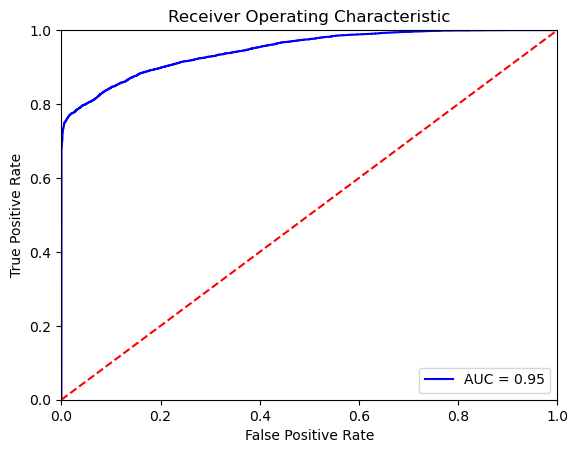

C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


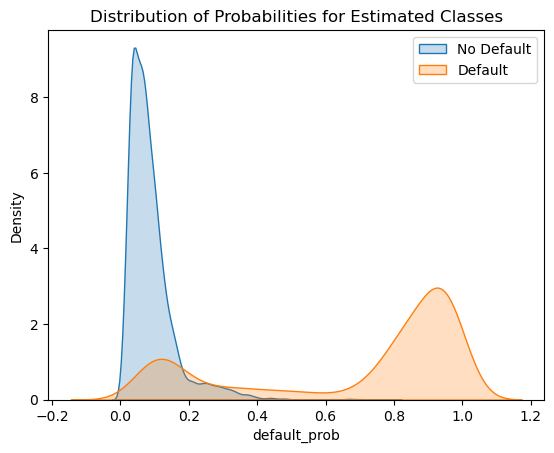

true_class  predicted_class
0           0                  0.997835
            1                  0.002165
1           1                  0.720496
            0                  0.279504
Name: proportion, dtype: float64


In [11]:
eval_model(rfc_model, x_train, y_train)

## Weight Balancing 

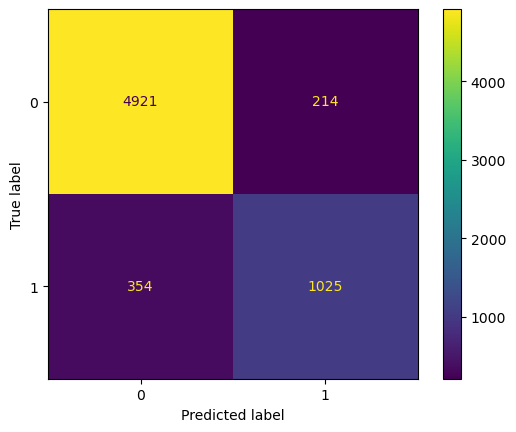



Accuracy:  0.9128031931225054
Precision:  0.8272800645682001
Recall:  0.7432922407541697
F1:  0.7830404889228417
AUC:  0.9258838058426826


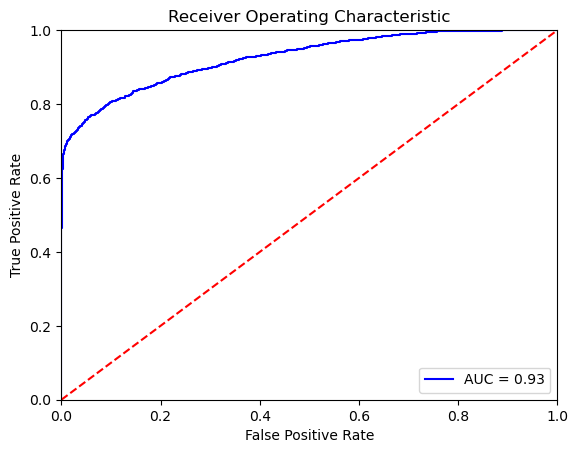

C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


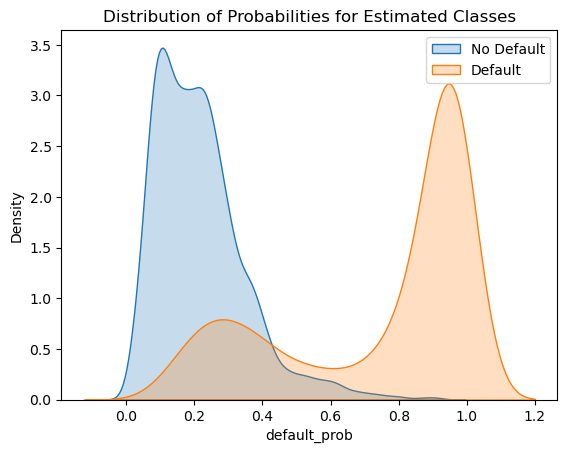

true_class  predicted_class
0           0                  0.958325
            1                  0.041675
1           1                  0.743292
            0                  0.256708
Name: proportion, dtype: float64


In [12]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 10, class_weight='balanced')

rfc_model.fit(x_train, y_train)
eval_model(rfc_model, x_test, y_test)

## Class Weights 

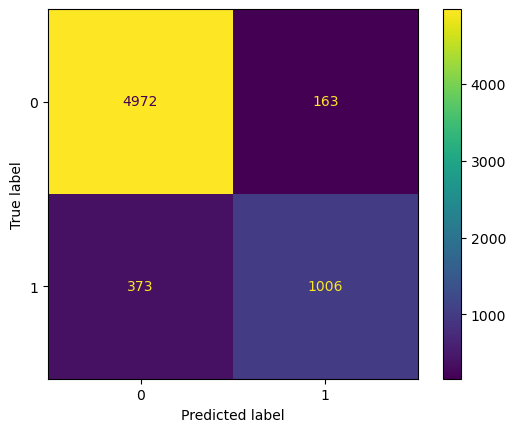



Accuracy:  0.9177156892846178
Precision:  0.8605645851154833
Recall:  0.7295141406816533
F1:  0.7896389324960752
AUC:  0.9246016721824728


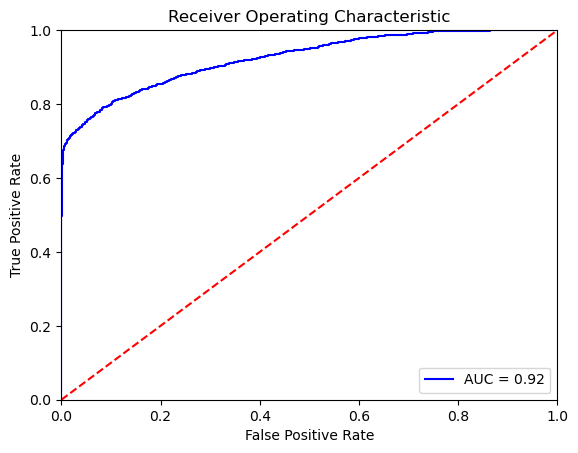

C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


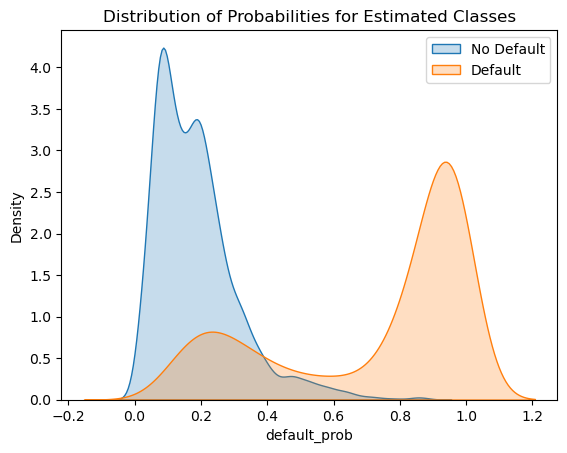

true_class  predicted_class
0           0                  0.968257
            1                  0.031743
1           1                  0.729514
            0                  0.270486
Name: proportion, dtype: float64


In [13]:
weights = {0:0.27, 1:0.73}

rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 10, class_weight=weights)

rfc_model.fit(x_train, y_train)
eval_model(rfc_model, x_test, y_test)

## Resampling

### Upsampling

In [14]:
train_df = x_train.copy()
train_df['loan_status'] = y_train

In [15]:
print(train_df['loan_status'].value_counts())
print(train_df['loan_status'].value_counts(normalize=True))

loan_status
0    20324
1     5728
Name: count, dtype: int64
loan_status
0    0.780132
1    0.219868
Name: proportion, dtype: float64


In [16]:
train_minority = train_df[train_df['loan_status'] == 1]
train_majority = train_df[train_df['loan_status'] == 0]

In [17]:
train_minority_up = resample(train_minority, replace=True,  n_samples=train_majority.shape[0], random_state=123)

In [18]:
print(train_majority['loan_status'].value_counts())
print(train_minority_up['loan_status'].value_counts())

loan_status
0    20324
Name: count, dtype: int64
loan_status
1    20324
Name: count, dtype: int64


In [19]:
train_up_df = pd.concat([train_majority, train_minority_up])

In [20]:
print(train_up_df['loan_status'].value_counts())
print(train_up_df['loan_status'].value_counts(normalize=True))

loan_status
0    20324
1    20324
Name: count, dtype: int64
loan_status
0    0.5
1    0.5
Name: proportion, dtype: float64


In [21]:
x_train_up = train_up_df.drop(['loan_status'], axis=1)
y_train_up = train_up_df['loan_status']

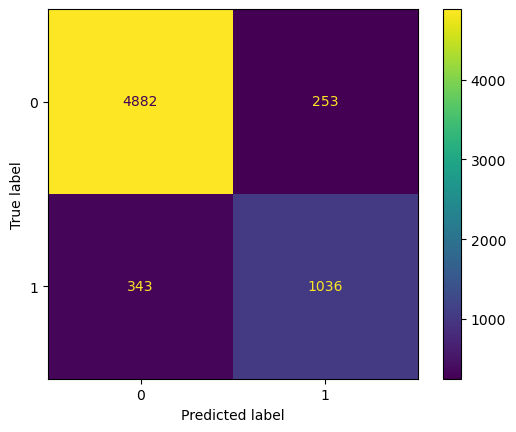



Accuracy:  0.9085047589806571
Precision:  0.8037238169123352
Recall:  0.751269035532995
F1:  0.7766116941529235
AUC:  0.9236016954837234


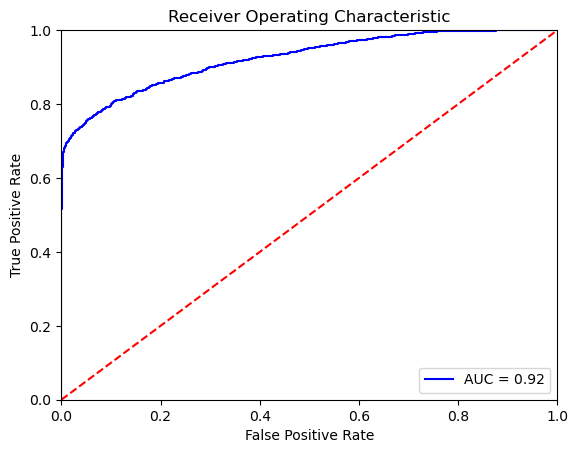

C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


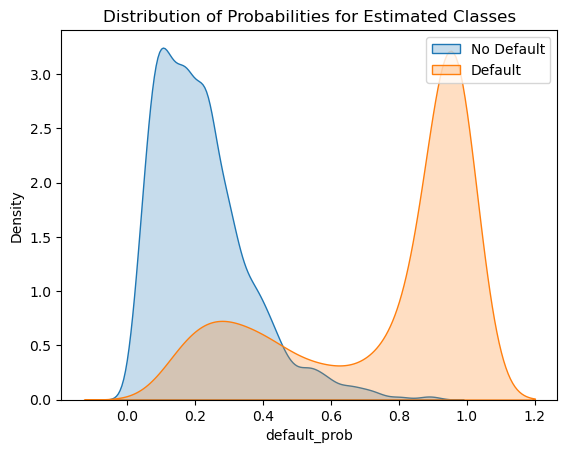

true_class  predicted_class
0           0                  0.950730
            1                  0.049270
1           1                  0.751269
            0                  0.248731
Name: proportion, dtype: float64


In [22]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth=10)

rfc_model.fit(x_train_up, y_train_up)
eval_model(rfc_model, x_test, y_test)

### Downsampling

In [23]:
def balance_sample(x_train, y_train, sample_mode='up'):
    train_df = x_train.copy()
    train_df['loan_status'] = y_train

    train_minority = train_df[train_df['loan_status'] == 1]
    train_majority = train_df[train_df['loan_status'] == 0]

    train_sampled_df = pd.DataFrame()

    if sample_mode == 'down':
        train_majority_down = resample(train_majority, replace=False,  n_samples=train_minority.shape[0], random_state=123)
        train_sampled_df = pd.concat([train_minority, train_majority_down])  
    else:
        train_minority_up = resample(train_minority, replace=True,  n_samples=train_majority.shape[0], random_state=123)
        train_sampled_df = pd.concat([train_majority, train_minority_up])

    x_train_samp = train_sampled_df.drop(['loan_status'], axis=1)
    y_train_samp = train_sampled_df['loan_status']

    return x_train_samp, y_train_samp 

In [24]:
x_train_dwn, y_train_dwn = balance_sample(x_train, y_train, sample_mode='down')

print(y_train_dwn.value_counts())
print(y_train_dwn.value_counts(normalize=True))

loan_status
1    5728
0    5728
Name: count, dtype: int64
loan_status
1    0.5
0    0.5
Name: proportion, dtype: float64


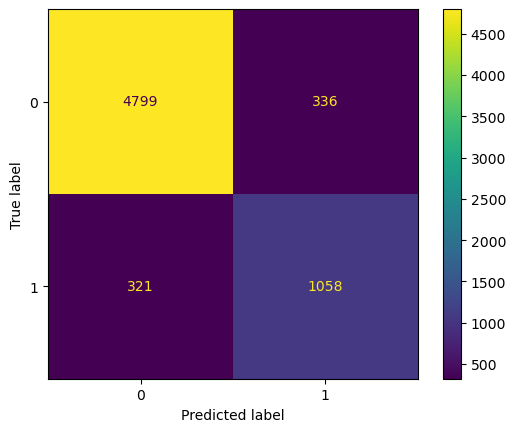



Accuracy:  0.8991403131716303
Precision:  0.7589670014347202
Recall:  0.7672226250906454
F1:  0.7630724846736385
AUC:  0.9205526209317253


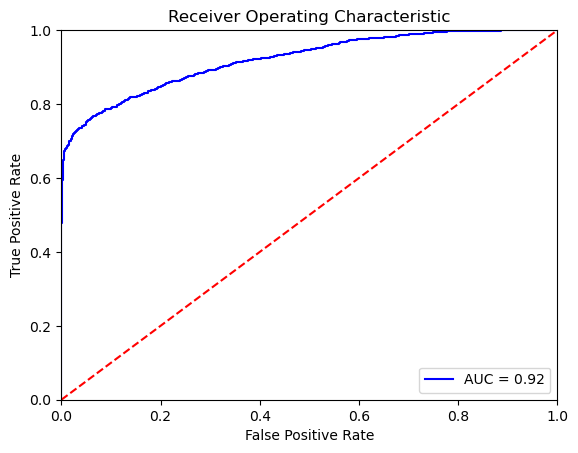

C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


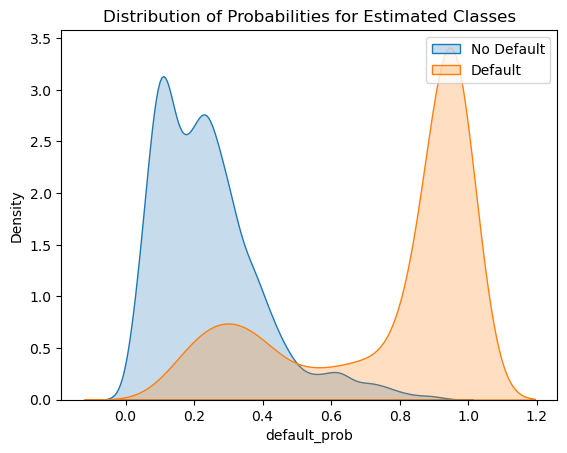

true_class  predicted_class
0           0                  0.934567
            1                  0.065433
1           1                  0.767223
            0                  0.232777
Name: proportion, dtype: float64


In [25]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 10)

rfc_model.fit(x_train_dwn, y_train_dwn)
eval_model(rfc_model, x_test, y_test)

### SMOTE

In [26]:
smote = SMOTE()

In [27]:
x_train_synth, y_train_synth = smote.fit_resample(x_train, y_train)

In [28]:
print(y_train_synth.value_counts())
print(y_train_synth.value_counts(normalize=True))

loan_status
1    20324
0    20324
Name: count, dtype: int64
loan_status
1    0.5
0    0.5
Name: proportion, dtype: float64


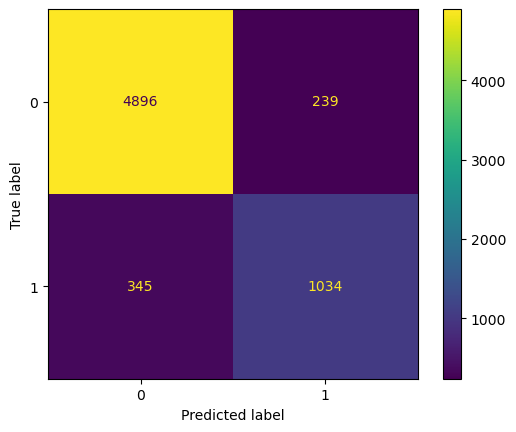



Accuracy:  0.9103469450414492
Precision:  0.812254516889238
Recall:  0.7498187092095722
F1:  0.779788838612368
AUC:  0.9241545706109093


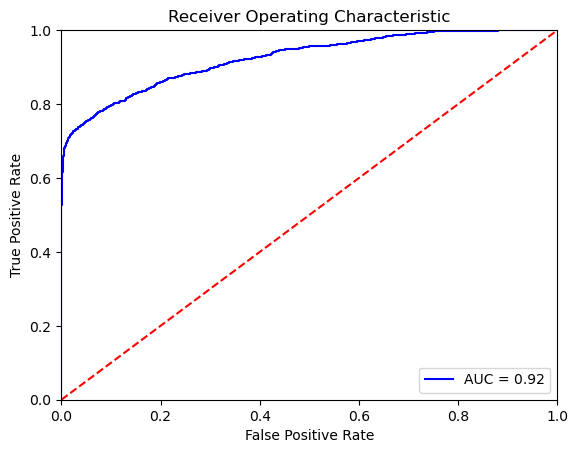

C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


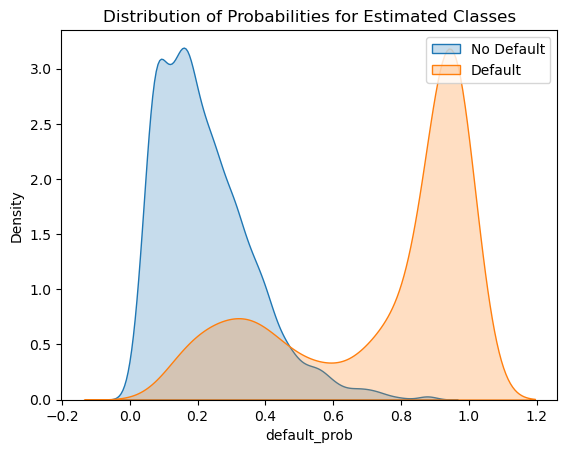

true_class  predicted_class
0           0                  0.953457
            1                  0.046543
1           1                  0.749819
            0                  0.250181
Name: proportion, dtype: float64


In [29]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 10)

rfc_model.fit(x_train_synth, y_train_synth)
eval_model(rfc_model, x_test, y_test)

## Predictions on New Data

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [135]:
# Load the new unseen data
new_data = pd.read_csv('new_data_1.csv')
new_data_1 = new_data.copy()
new_data_1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,60000,MORTGAGE,6,EDUCATION,B,1000,11.14,0.02,N,5
1,45,80000,OWN,4,MEDICAL,C,5500,12.87,0.07,N,4
2,82,65500,OWN,7,PERSONAL,C,35000,15.23,0.53,N,3
3,42,54400,RENT,6,MEDICAL,C,35000,14.27,0.64,Y,6
4,26,40000,OWN,3,PERSONAL,A,2500,7.14,0.06,N,3
5,20,30000,RENT,5,VENTURE,B,35000,12.42,1.17,Y,4
6,28,78956,MORTGAGE,8,MEDICAL,B,35000,11.11,0.44,N,2
7,29,83000,RENT,9,PERSONAL,A,35000,8.90,0.42,N,3
8,35,100000,MORTGAGE,4,VENTURE,D,1600,14.74,0.02,N,4
9,50,85000,OWN,5,EDUCATION,B,35000,10.37,0.41,N,5


In [136]:
numeric_cols = ['person_age', 
                'person_income', 
                'person_emp_length', 
                'loan_amnt', 
                'loan_int_rate', 
                'cb_person_cred_hist_length']

In [137]:
mm_scaler = MinMaxScaler()

new_data_1[numeric_cols] = mm_scaler.fit_transform(new_data_1[numeric_cols])


In [138]:
new_data_1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0.274194,0.428571,MORTGAGE,0.500000,EDUCATION,B,0.000000,0.298730,0.02,N,0.75
1,0.403226,0.714286,OWN,0.166667,MEDICAL,C,0.132353,0.427931,0.07,N,0.50
2,1.000000,0.507143,OWN,0.666667,PERSONAL,C,1.000000,0.604182,0.53,N,0.25
3,0.354839,0.348571,RENT,0.500000,MEDICAL,C,1.000000,0.532487,0.64,Y,1.00
4,0.096774,0.142857,OWN,0.000000,PERSONAL,A,0.044118,0.000000,0.06,N,0.25
5,0.000000,0.000000,RENT,0.333333,VENTURE,B,1.000000,0.394324,1.17,Y,0.50
6,0.129032,0.699371,MORTGAGE,0.833333,MEDICAL,B,1.000000,0.296490,0.44,N,0.00
7,0.145161,0.757143,RENT,1.000000,PERSONAL,A,1.000000,0.131441,0.42,N,0.25
8,0.241935,1.000000,MORTGAGE,0.166667,VENTURE,D,0.017647,0.567588,0.02,N,0.50
9,0.483871,0.785714,OWN,0.333333,EDUCATION,B,1.000000,0.241225,0.41,N,0.75


In [139]:
from sklearn.preprocessing import OneHotEncoder

In [140]:
ohe = OneHotEncoder(sparse_output=False)                   

col_names = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

dummy_cols = ohe.fit_transform(new_data_1[col_names])
dummy_names = ohe.get_feature_names_out()
dummy_cols = pd.DataFrame(dummy_cols,columns = dummy_names, dtype = int)

df_ohe_new_data = pd.concat([new_data_1,dummy_cols], axis = 1)
df_ohe_new_data = df_ohe_new_data.drop(col_names, axis = 1)
new_data_1 = df_ohe_new_data
new_data_1

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.274194,0.428571,0.500000,0.000000,0.298730,0.02,0.75,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.403226,0.714286,0.166667,0.132353,0.427931,0.07,0.50,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1.000000,0.507143,0.666667,1.000000,0.604182,0.53,0.25,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.354839,0.348571,0.500000,1.000000,0.532487,0.64,1.00,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.096774,0.142857,0.000000,0.044118,0.000000,0.06,0.25,0,0,1,...,0,1,0,0,0,0,0,0,1,0
5,0.000000,0.000000,0.333333,1.000000,0.394324,1.17,0.50,0,0,0,...,1,0,1,0,0,0,0,0,0,1
6,0.129032,0.699371,0.833333,1.000000,0.296490,0.44,0.00,1,0,0,...,0,0,1,0,0,0,0,0,1,0
7,0.145161,0.757143,1.000000,1.000000,0.131441,0.42,0.25,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0.241935,1.000000,0.166667,0.017647,0.567588,0.02,0.50,1,0,0,...,1,0,0,0,1,0,0,0,1,0
9,0.483871,0.785714,0.333333,1.000000,0.241225,0.41,0.75,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [141]:
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data_1)

# Make predictions
predictions = rfc_model.predict(new_data_scaled)

# Optionally, get prediction probabilities
prediction_probs = rfc_model.predict_proba(new_data_scaled)

results = pd.DataFrame({
        'Prediction': predictions,
        'Probability_Class_0': prediction_probs[:, 0],
        'Probability_Class_1': prediction_probs[:, 1]})
    
new_data_results = pd.concat([new_data, results], axis=1) 
    
new_data_results

C:\Users\guilh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\guilh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Prediction,Probability_Class_0,Probability_Class_1
0,37,60000,MORTGAGE,6,EDUCATION,B,1000,11.14,0.02,N,5,0,0.625890,0.374110
1,45,80000,OWN,4,MEDICAL,C,5500,12.87,0.07,N,4,0,0.951978,0.048022
2,82,65500,OWN,7,PERSONAL,C,35000,15.23,0.53,N,3,0,0.761070,0.238930
3,42,54400,RENT,6,MEDICAL,C,35000,14.27,0.64,Y,6,1,0.083791,0.916209
4,26,40000,OWN,3,PERSONAL,A,2500,7.14,0.06,N,3,0,0.838017,0.161983
5,20,30000,RENT,5,VENTURE,B,35000,12.42,1.17,Y,4,1,0.088147,0.911853
6,28,78956,MORTGAGE,8,MEDICAL,B,35000,11.11,0.44,N,2,0,0.789547,0.210453
7,29,83000,RENT,9,PERSONAL,A,35000,8.90,0.42,N,3,0,0.842360,0.157640
8,35,100000,MORTGAGE,4,VENTURE,D,1600,14.74,0.02,N,4,0,0.729549,0.270451
9,50,85000,OWN,5,EDUCATION,B,35000,10.37,0.41,N,5,0,0.891736,0.108264
